In [1]:
cd /home/disk2/wdd/PDZ/12concentration

/home/disk2/wdd/PDZ/12concentration


In [2]:
import mdtraj as md
import numpy as np

In [72]:
# crystal trj
t=md.load('c_fit.xtc',top='begin_cry.pdb')
indices_phi_con, phi_con=md.compute_phi(t)
indices_psi_con, psi_con=md.compute_psi(t)

In [82]:
# distance between protein and ligand
#atom_pairs=[[1810,360],[1810,386],[1810,1177],[1746,458],[1746,1060],[1812,365],[1812,396],[1812,1163]]
atom_pairs=[[1746,458],[1746,1060],[1812,365],[1812,396],[1812,1163],[1822,358]]
distances=md.compute_distances(t,atom_pairs=atom_pairs)
print distances[0]
alldist_sd=[]
outname='crystal_rdistances.cs'
wf=open(outname,'w')
for i in range(len(distances)):
    dist_sd=singleSD(distances[i],distances_crystal)
    wf.write(str(dist_sd)+'\n')
    alldist_sd.append(dist_sd)
wf.close()

[ 0.73956954  0.83663261  0.55501521  0.54185426  0.55677021  0.34649992]


In [15]:
distances_ave=np.mean(distances,axis=1)

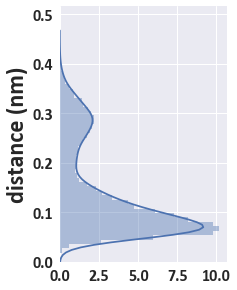

In [76]:
time_step=0.01       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
fig, ax = plt.subplots(figsize=(3,4.7))
time = np.arange(len(alldist_sd))*time_step
#ax.plot(time,distances_ave)
ax = sns.distplot(alldist_sd, vertical=True)
#ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
ax.set_ylabel('distance (nm)',fontproperties=font_prop)
#ax.set_xlabel('time (ns)',fontproperties=font_prop)
plt.ylim(0,np.max(alldist_sd)*1.2)
#plt.xlim(0,np.max(time))
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.savefig("cry_rdistances2_AB_hist2.png",dpi=600,bbox_inches='tight')
plt.show()

In [74]:
#distances_crystal=[ 0.54559505,  0.53118175,  0.69912583,  0.73956954,  0.83663261]
distances_crystal=[ 0.54559505,  0.53118175,  0.69912583,  0.73956954,  0.83663261,  0.55501521, 0.54185426,  0.55677021]

In [6]:
t_ref=md.load('12con_ref.pdb',top='12con_ref.pdb')
#for nt in [1,2,3,4,5,6,7,8,10,11,12]:
for nt in range(2,53):
    t_con=md.load('trj/all/fit'+str(nt)+'-all.xtc',top='begin.pdb',stride=10)
    for i in range(1,13):
        con_noh=[atom.index for atom in t_con.topology.chain(i).atoms if ((atom.residue.index > (109+6*i) and atom.residue.index <= (114+6*i)) and (atom.name in ['CA', 'CB', 'N', 'C', 'O']))]
        con_rmsds=md.rmsd(t_con,t_ref,0,atom_indices=con_noh)
        #atom_pairs=[[1723+87*i,360],[1723+87*i,386],[1723+87*i,1177],[1659+87*i,458],[1659+87*i,1060]]
        #distances=md.compute_distances(t_con,atom_pairs=atom_pairs)
        #distances_ave=np.mean(distances,axis=1)
        #outname='fit'+str(nt)+'_pdz'+str(i)+'.rmsd_dist2'
        outname='fit'+str(nt)+'_chain'+str(i)+'_rmsd.cs'
        wf=open(outname,'w')
        wf.write('#rmsd \n')
        for j in range(len(con_rmsds)):
            #wf.write(str(con_rmsds[j])+'    '+str(distances_ave[j])+'\n')
            wf.write(str(con_rmsds[j])+'\n')
        wf.close()

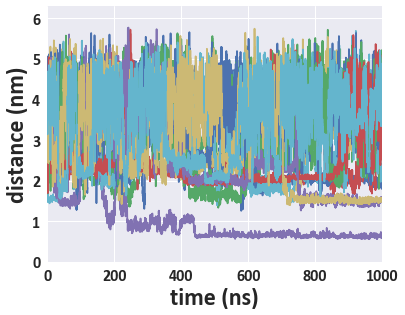

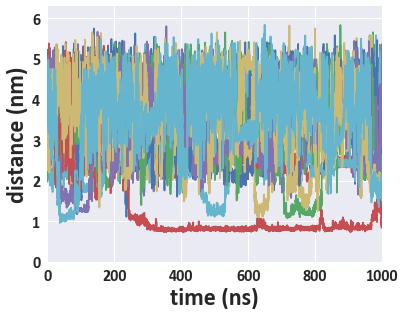

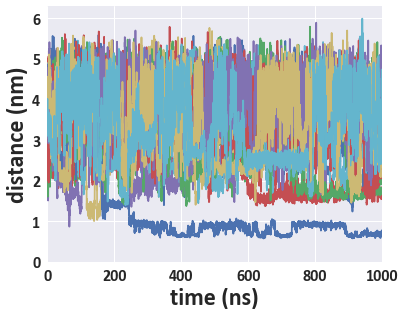

In [13]:
time_step=0.1       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
#for nt in [1,2,3,4,5,6,7,8,10,11,12]:
for nt in [1,3,11]:
    fig, ax = plt.subplots(figsize=(6,4.7))
    for i in range(1,13):
        data = np.loadtxt('fit'+str(nt)+'_pdz'+str(i)+'.rmsd_dist2')
        dist = data[:,1]
        time = np.arange(len(dist))*time_step
        ax.plot(time,dist,label=str(i))
        #ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
    ax.set_ylabel('distance (nm)',fontproperties=font_prop)
    ax.set_xlabel('time (ns)',fontproperties=font_prop)
    plt.ylim(0,6.3)
    plt.xlim(0,1000)
    #ax.set_xticks(np.linspace(0,1200,7))
    #ax.set_xticklabels([0,200,400,600,800,1000])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig("fit"+str(nt)+"_distances2_AB.png",dpi=600,bbox_inches='tight')
    plt.show()

In [20]:
#function of rmsd of distance
def singleSD(nList,refList):
    length=len(nList)
    sumVar=0.0
    for i in range(length):
        sub=nList[i]-refList[i]
        sumVar+=sub**2
    return ((float(sumVar)/float((length)))**0.5)

In [90]:
#distances_crystal=[ 0.54559505,  0.53118175,  0.69912583,  0.73956954,  0.83663261,  0.55501521, 0.54185426,  0.55677021]
distances_crystal=[ 0.73956954,  0.83663261,  0.55501521,  0.54185426,  0.55677021,  0.34649992]
t_ref=md.load('12con_ref.pdb',top='12con_ref.pdb')
#for nt in range(1,47):
for nt in [47,49,50,51]:
#for nt in [34,37,38,39,40,41,42,43,44,46]:
#for nt in [2,4,5,6,7,8,9,10,12,13,14,15,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,36]:
    t_con=md.load('fit'+str(nt)+'.xtc',top='begin.pdb',stride=10)
    for i in range(1,13):
        con_noh=[atom.index for atom in t_con.topology.chain(i).atoms if ((atom.residue.index > (109+6*i) and atom.residue.index <= (114+6*i)) and (atom.name in ['CA', 'CB', 'N', 'C', 'O']))]
        con_rmsds=md.rmsd(t_con,t_ref,0,atom_indices=con_noh)
        #atom_pairs=[[1723+87*i,360],[1723+87*i,386],[1723+87*i,1177],[1659+87*i,458],[1659+87*i,1060],[1725+87*i,365],[1725+87*i,396],[1725+87*i,1163]]
        atom_pairs=[[1659+87*i,458],[1659+87*i,1060],[1725+87*i,365],[1725+87*i,396],[1725+87*i,1163],[1735+87*i,358]]
        distances=md.compute_distances(t_con,atom_pairs=atom_pairs)
        #distances_ave=np.mean(distances,axis=1)
        outname='fit'+str(nt)+'_pdz'+str(i)+'.rmsd_rdist3'
        wf=open(outname,'w')
        wf.write('#rmsd     distance\n')
        for j in range(len(con_rmsds)):
            dist_sd=singleSD(distances[j],distances_crystal)
            wf.write(str(con_rmsds[j])+'    '+str(dist_sd)+'\n')
        wf.close()

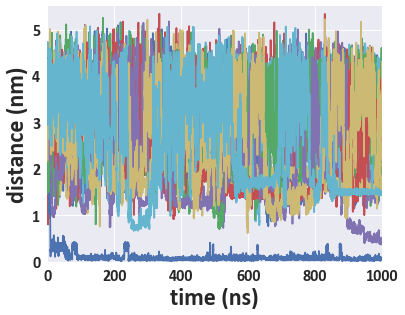

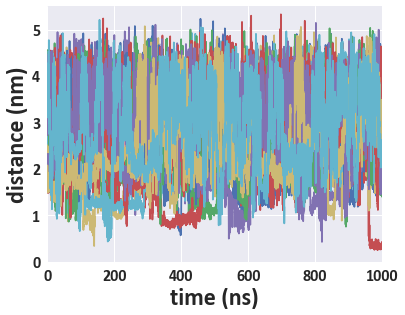

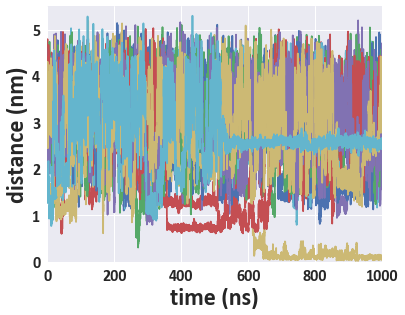

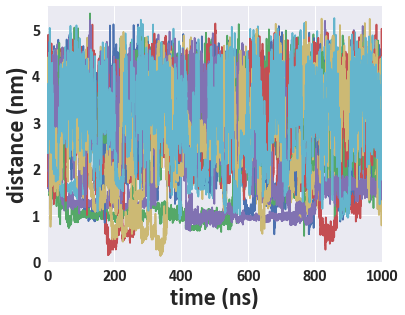

In [91]:
time_step=0.1       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
#for nt in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,36]:
#for nt in [34,37,38,39,40,41,42,43,44,46]:
#for nt in range(1,47):
for nt in [47,49,50,51]:
    fig, ax = plt.subplots(figsize=(6,4.7))
    for i in range(1,13):
        data = np.loadtxt('fit'+str(nt)+'_pdz'+str(i)+'.rmsd_rdist3')
        dist = data[:,1]
        time = np.arange(len(dist))*time_step
        ax.plot(time,dist,label=str(i))
        #ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
    ax.set_ylabel('distance (nm)',fontproperties=font_prop)
    ax.set_xlabel('time (ns)',fontproperties=font_prop)
    plt.ylim(0,5.5)
    plt.xlim(0,1000)
    #ax.set_xticks(np.linspace(0,1200,7))
    #ax.set_xticklabels([0,200,400,600,800,1000])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig("fit"+str(nt)+"_rdistances3_AB.png",dpi=600,bbox_inches='tight')
    plt.show()

In [62]:
pwd

u'/home/disk2/wdd/PDZ/12concentration'

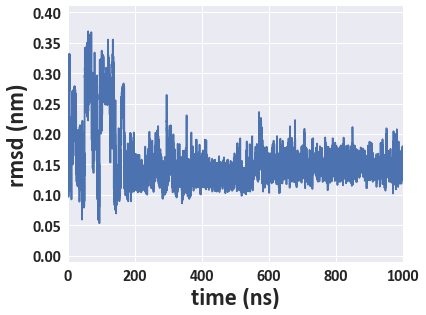

In [55]:
#rmsd
time_step=0.1       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
for nt in [36]:
#for nt in [1]:
    fig, ax = plt.subplots(figsize=(6,4.7))
    i=8
    data = np.loadtxt('fit'+str(nt)+'_pdz'+str(i)+'.rmsd_rdist2')
    dist = data[:,0]
    time = np.arange(len(dist))*time_step
    ax.plot(time,dist,label=str(i))
        #ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
    ax.set_ylabel('rmsd (nm)',fontproperties=font_prop)
    ax.set_xlabel('time (ns)',fontproperties=font_prop)
    plt.ylim(-0.01,0.41)
    plt.xlim(0,1000)
    #ax.set_xticks(np.linspace(0,1200,7))
    #ax.set_xticklabels([0,200,400,600,800,1000])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig("fit"+str(nt)+"_rmsd"+str(i)+".png",dpi=600,bbox_inches='tight')
    plt.show()

In [57]:
pwd

u'/home/disk2/wdd/PDZ/12concentration/rmsd_rdist2'

In [58]:
cd ..

/home/disk2/wdd/PDZ/12concentration
